# ∆pCO2 SEACOW Analysis Script
- Read in ∆pCO2 data
- Plot time-series
- Fit exponential to calculate end-point for water-side

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
from scipy import stats

In [15]:
filename = '2023_05_20_SEACOW4'
filepath = os.path.join('Data', filename+'.csv')
df = pd.read_csv(filepath, header = 0)
df.head()
len(df)

294

In [3]:
#percents = [0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#for i in percents:
 #   new = len(df) * i 
  #  dfnew = df.loc[:new]

num = len(df)*(.20)
#num2 = len(df)*
df = df.truncate(after=num)
len(df)

59

## Break down into air-side and water-side measurements
- `State` column contains "air" or "water" indicating measurement side

## Get CO2 values, separate into air and water-side

In [16]:
# Get CO2 
df_post = df[15:].reset_index() # in case there's an initial "warm-up" dip
CO2 = df_post.loc[:, 'CO2_ppm']
CO2

0      771
1      767
2      762
3      760
4      767
      ... 
274    846
275    846
276    843
277    844
278    854
Name: CO2_ppm, Length: 279, dtype: int64

## Get time, separate into air and water-side

In [17]:
# Select elapsed time (in milliseconds) column and break into air/water sections
etime_ms = df_post.loc[:, 'Elapsed_Time'].astype(int)
etime_hr = etime_ms/1000/60/60
etime_hr

0      0.172213
1      0.173069
2      0.173933
3      0.174793
4      0.226278
         ...   
274    3.191192
275    3.192052
276    3.192916
277    3.193781
278    3.194646
Name: Elapsed_Time, Length: 279, dtype: float64

## Plot "raw" time-series

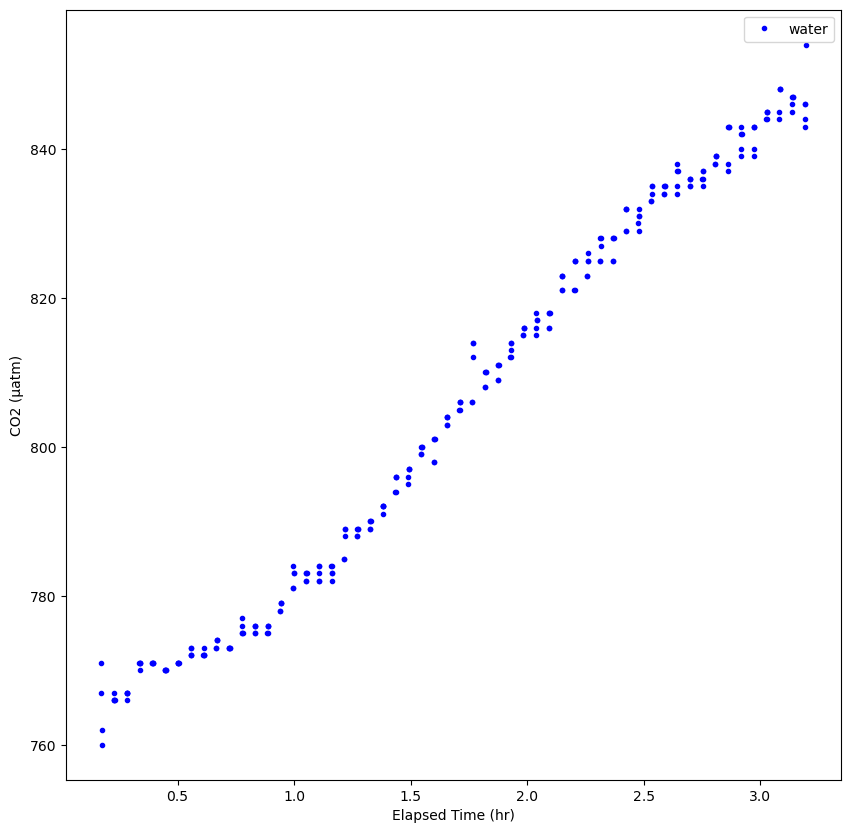

In [18]:
#%% Plot CO2 vs. time from raw data
fig, axs = plt.subplots(figsize = (10, 10))
axs.plot(etime_hr, CO2, 'b.', label = 'water')
# axs.plot(etime_hr_water, CO2_water, 'k.', label = 'water')

axs.set_ylabel('CO2 (µatm)')
axs.set_xlabel('Elapsed Time (hr)')

axs.legend(loc = "best")

`p(t) = (p2-p1)*(1-e^(-t/Tau))+p1`
- p1 is starting pCO2
- p2 is estimated endpoint
- tau we hope we know from lab work
- t is elapsed time

value of p2 =  1683738.1852550006
value of tau =  69261.32165050604


Text(0.5, 0, 'Time (hours)')

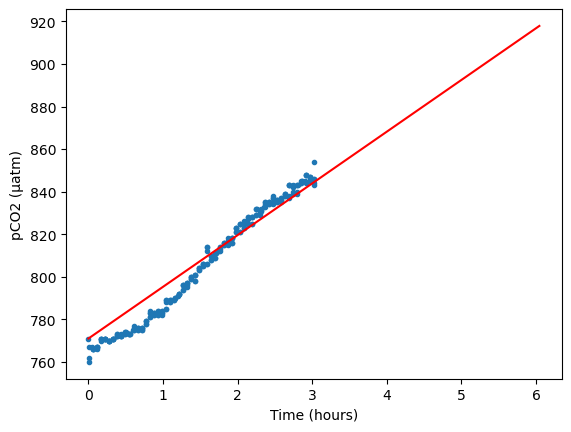

In [19]:
p1 = np.nanmean(CO2[0]) # starting pCO2
tau = .24 # hr, 63% response time; guess and check
t = etime_hr-etime_hr[0]
y = CO2

# first-order response function to fit
def FOR(t, p2, tau):
    return (p2-p1)*(1-np.exp(-t/tau))+p1

fig, axs = plt.subplots()
popt, pcov = scipy.optimize.curve_fit(FOR, t, y)

p2, tau = popt
print("value of p2 = ", p2)
print("value of tau = ", tau)

axs.plot(t, y, ".")
teval = np.linspace(t.min(), t.max()*2, 201)
yeval = FOR(teval,*popt)
axs.plot(teval, yeval, color='red')

axs.set_ylabel('pCO2 (µatm)')
axs.set_xlabel('Time (hours)')

In [349]:
etime_hr

0       0.135170
1       0.135746
2       0.136322
3       0.136898
4       0.137470
          ...   
1146    0.796049
1147    0.796625
1148    0.797202
1149    0.797778
1150    0.798354
Name: Elapsed_Time, Length: 1151, dtype: float64

In [ ]:
t

In [ ]:
CO2